# Low level plotting utilities

This notebook demonstrates how to use the plotting utilities offered by the package to plot performance tables, functions and more.

## Import data

We start by importing the data from our notebook on the performance tables usage, so we have things to plot!

In [1]:
%matplotlib inline
%config Completer.use_jedi = False
%run performance_table_usage.ipynb

c01       0.0
c02    medium
c03         +
Name: a01, dtype: object
c01     0.5
c02    good
c03      ++
Name: a02, dtype: object
c01    1.0
c02    bad
c03      -
Name: a03, dtype: object
c01       0.2
c02    medium
c03         0
Name: a04, dtype: object
c01       0.9
c02    medium
c03         +
Name: a05, dtype: object
a01: [0.0, 'medium', '+']
a02: [0.5, 'good', '++']
a03: [1.0, 'bad', '-']
a04: [0.2, 'medium', '0']
a05: [0.9, 'medium', '+']
a01: [0.0, 'medium', '+']
a02: [0.5, 'good', '++']
a03: [1.0, 'bad', '-']
a04: [0.2, 'medium', '0']
a05: [0.9, 'medium', '+']
a01    0.0
a02    0.5
a03    1.0
a04    0.2
a05    0.9
Name: c01, dtype: float64
a01    medium
a02      good
a03       bad
a04    medium
a05    medium
Name: c02, dtype: object
a01     +
a02    ++
a03     -
a04     0
a05     +
Name: c03, dtype: object
{'[0, 0.3]': 'AffineFunction(constant=1.0, slope=-10.0)', '[0.3, 0.6]': 'AffineFunction(constant=-4.5, slope=8.333333333333334)', '[0.6, 1]': 'AffineFunction(constant=-6.25, slo

In [2]:
perfTable.data

c01     c02 c03
a01  0.0  medium   +
a02  0.5    good  ++
a03  1.0     bad   -
a04  0.2  medium   0
a05  0.9  medium   +

## Plotting performance tables

In [3]:
from mcda.plot import *
from mcda.transformers import normalize

/workspaces/pymcda/mcda/plot/plot.py:254: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


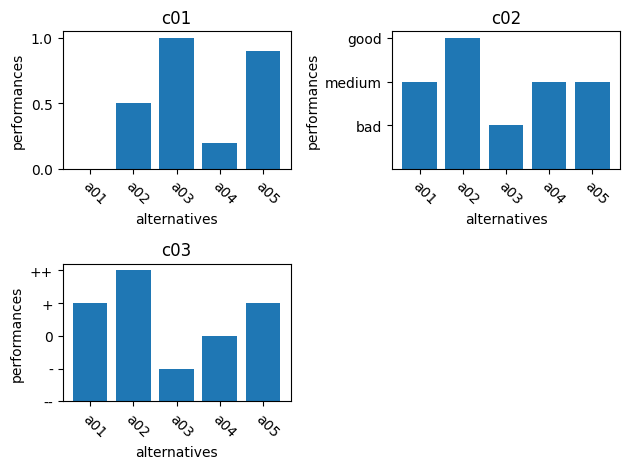

In [4]:
fig = Figure(ncols=2)

x = [*range(len(alternatives))]
xticks = x
xticklabels = alternatives
for i in criteria:
    values = perfTable.criteria_values[i]
    ax = fig.create_add_axis()
    ax.title = i
    ax.xlabel = "alternatives"
    ax.ylabel = "performances"
    yticks = None
    yticklabels = None
    y = values.data
    if isinstance(values.scale, QualitativeScale):
        y = [v.scale.value(v.value) for v in values.values()]
        yticklabels = values.scale.range()
        yticks = [
            values.scale.value(yy) for yy in yticklabels
        ]
    elif isinstance(values.scale, NominalScale):
        yticklabels = values.scale.range()
        yticks = [*range(len(yticklabels))]
        y = [yticks[yticklabels.index(v.value)] for v in values.values()]
    ax.add_plot(
        BarPlot(
            x,
            y,
            xticks=xticks,
            yticks=yticks,
            xticklabels=xticklabels,
            yticklabels=yticklabels,
            xticklabels_tilted=True,
        )
    )
fig.draw()

/workspaces/pymcda/mcda/plot/plot.py:254: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig.show()


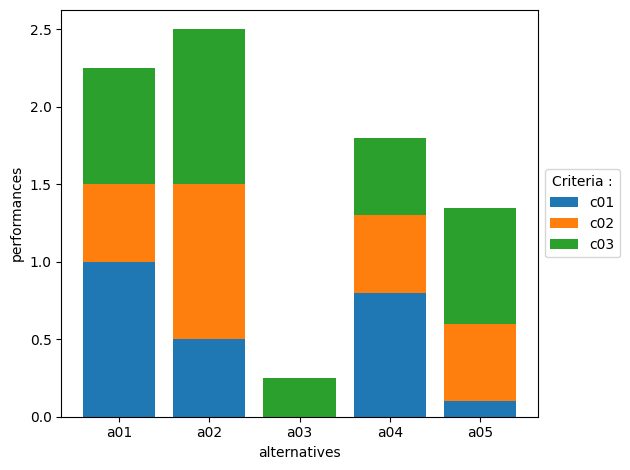

In [5]:
norm_table = normalize(perfTable)

ax = Axis()
ax.xlabel = "alternatives"
ax.ylabel = "performances"
x = [*range(len(alternatives))]
xticks = x
xticklabels = alternatives
values = []
for i in criteria:
    y = norm_table.criteria_values[i].data
    values.append(y)
ax.add_plot(
    StackedBarPlot(
        x,
        values,
        xticks=xticks,
        xticklabels=xticklabels,
        labels=criteria
    )
)
ax.add_legend("Criteria :")
ax.draw()

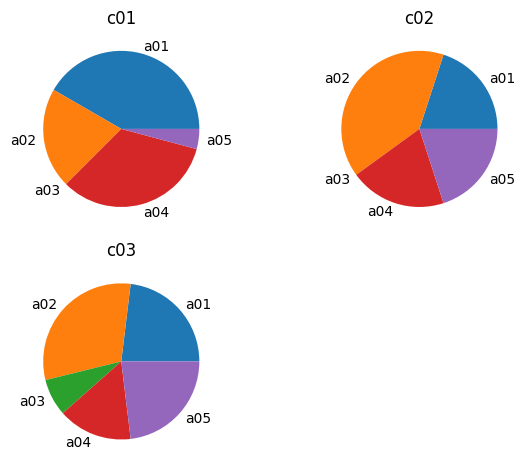

In [6]:
fig = Figure(ncols=2)

for i in criteria:
    values = norm_table.criteria_values[i].data
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

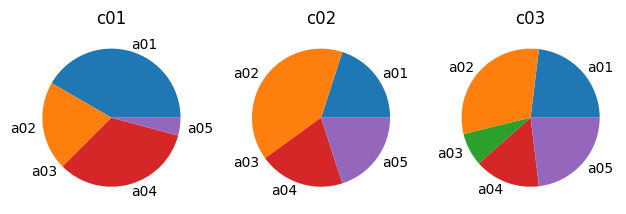

In [7]:
fig = Figure(nrows=1)

for i in criteria:
    values = norm_table.criteria_values[i].data
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

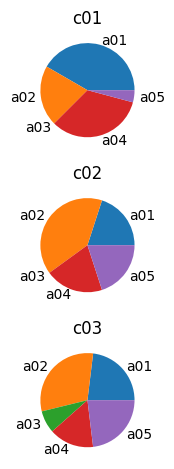

In [8]:
fig = Figure(ncols=1)

for i in criteria:
    values = norm_table.criteria_values[i].data
    ax = fig.create_add_axis()
    ax.title = i
    ax.add_plot(
        PiePlot(
            alternatives,
            values
        )
    )
fig.draw()

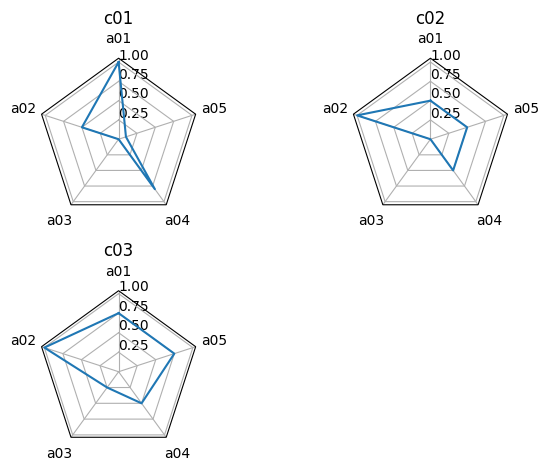

In [9]:
fig = Figure(ncols=2)

create_radar_projection(len(alternatives), frame="polygon")

for i in criteria:
    values = norm_table.criteria_values[i].data
    ax = fig.create_add_axis(
        projection=radar_projection_name(len(alternatives)))
    ax.title = i
    ax.add_plot(
        RadarPlot(
            alternatives,
            values
        )
    )
fig.draw()

In [10]:
values = list(norm_table.alternatives_values.values())[1]
values.data

c01    0.5
c02    1.0
c03    1.0
Name: a02, dtype: float64

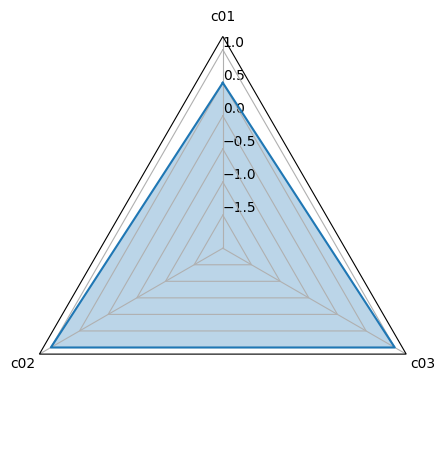

In [11]:
create_radar_projection(len(criteria), frame='polygon')
plot = RadarPlot(criteria, values.data, alpha=0.3, rlimits=[-2, 1.2])
plot.draw()

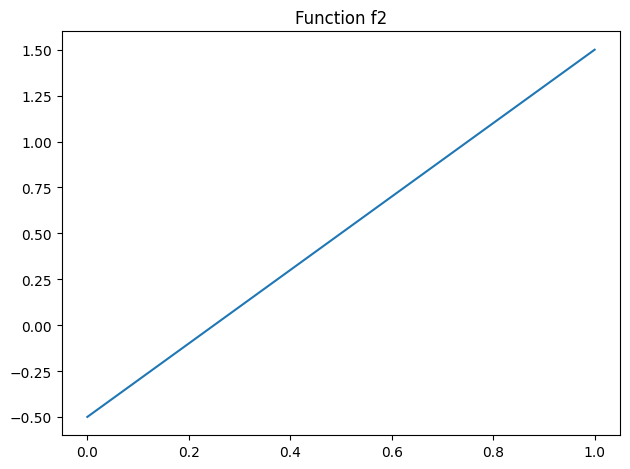

In [12]:
plot = LinePlot([0, 1], [f2(0), f2(1)])
plot.draw()
plot.axis.title = "Function f2"
plot.axis.figure.draw()

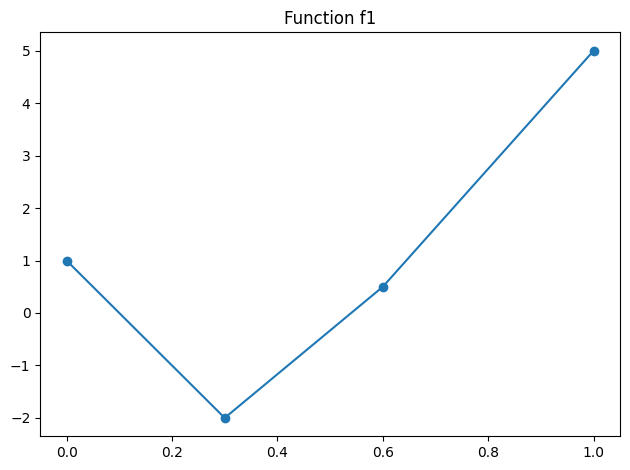

In [13]:
ax = Axis(title="Function f1")
x = []
y = []
for interval in f1.intervals:
    if len(x) == 0:
        x.append(interval.dmin)
        y.append(f1(interval.dmin))
    x.append(interval.dmax)
    y.append(f1(interval.dmax))
ax.add_plot(
    LinePlot(
        x,
        y,
        marker="o",
    )
)
ax.draw()

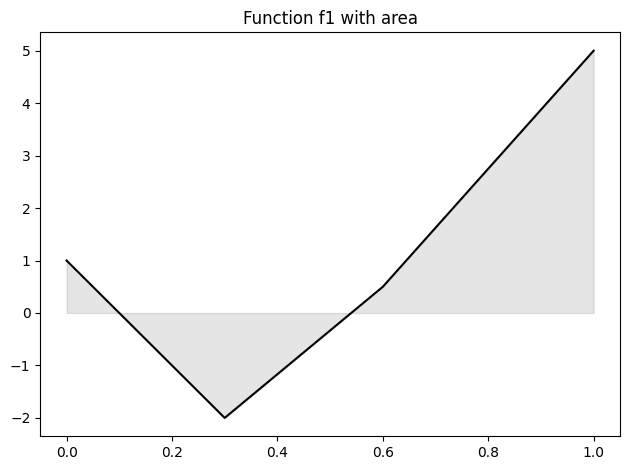

In [14]:
ax = Axis(title="Function f1 with area")
ax.add_plot(
    AreaPlot(
        x,
        y,
        color="black",
        alpha=0.1,
        strongline=True
    )
)
ax.draw()

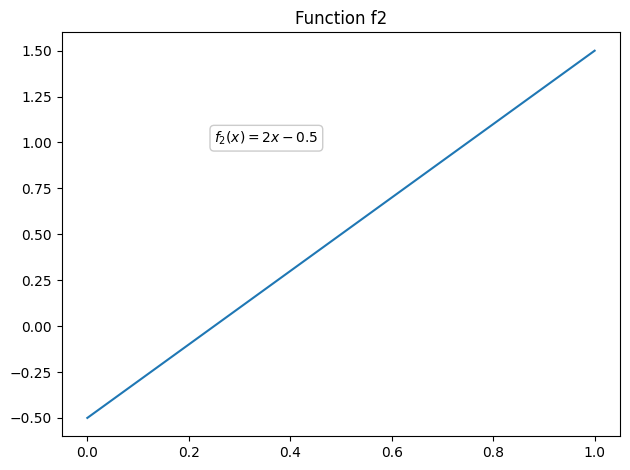

In [15]:
ax = Axis(title="Function f2")
x = [0, 0.2, 0.4, 0.6, 0.8, 1]
y = [f2(value) for value in x]
ax.add_plot(
    LinePlot(
        x,
        y,
    )
)
ax.add_plot(
    Text(
        0.25,
        1,
        "$f_2(x) = 2x - 0.5$",
        horizontal_alignement="left",
        box=True,
    )
)
ax.draw()

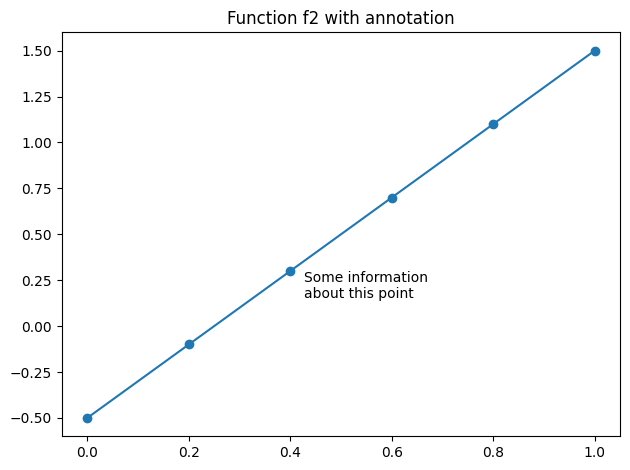

In [16]:
ax = Axis(title="Function f2 with annotation")
ax.add_plot(
    LinePlot(
        x,
        y,
        marker="o",
    )
)
ax.add_plot(
    Annotation(
        x[2],
        y[2],
        "Some information \nabout this point",
        10,
        0,
        horizontal_alignement="left",
        vertical_alignement="top",
    )
)
ax.draw()

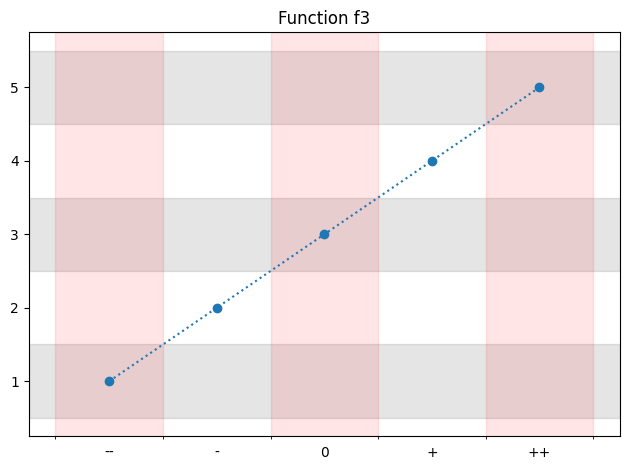

In [17]:
ax = Axis(title="Function f3")
ax.add_plot(
    HorizontalStripes(
        [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
        color="black",
        alpha=0.1,
    )
)
ax.add_plot(
    VerticalStripes(
        [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5],
        color="red",
        alpha=0.1,
        attach_xticks=True,
    )
)
ax.add_plot(
    LinePlot(
        [*range(len(f3.values.keys()))],
        [*f3.values.values()],
        xticks=[*range(len(f3.values.keys()))],
        xticklabels=[*f3.values.keys()],
        linestyle=":",
        marker="o",
    )
)
ax.draw()

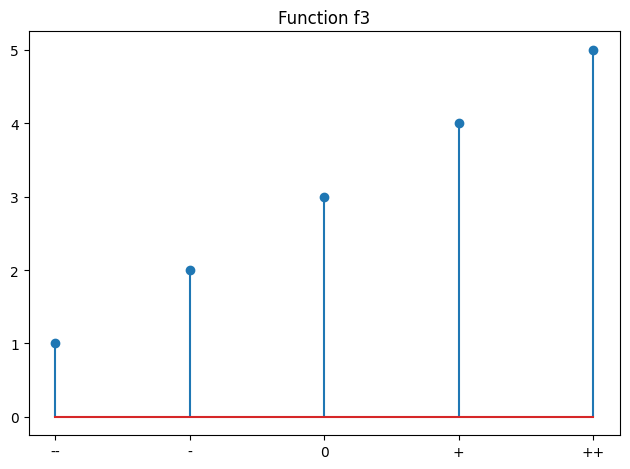

In [18]:
plot = StemPlot(
    [*range(len(f3.values.keys()))],
    [*f3.values.values()],
    xticks=[*range(len(f3.values.keys()))],
    xticklabels=[*f3.values.keys()]
)
plot.draw()
plot.axis.title = "Function f3"
plot.axis.figure.draw()

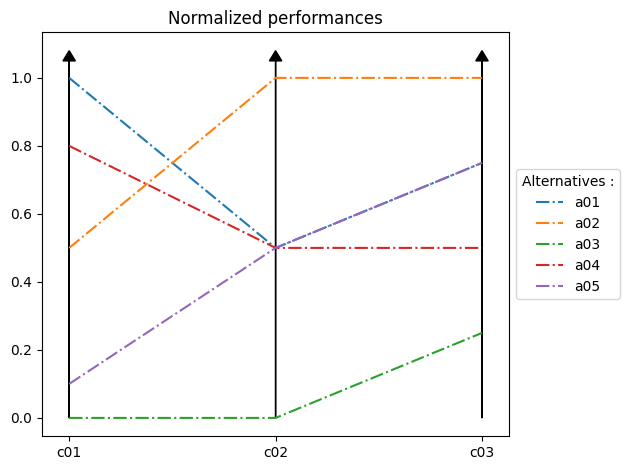

In [19]:
ax = Axis(title="Normalized performances")
x = [*range(len(criteria))]
values = norm_table.data
xticks=[*range(len(criteria))]
xticklabels=criteria
ax.add_plot(
    ParallelCoordinatesPlot(
        x,
        values,
        xticks=xticks,
        xticklabels=xticklabels,
        labels=alternatives,
        linestyle="-.",
    )
)
ax.add_legend(title="Alternatives :", location="right")
ax.draw()

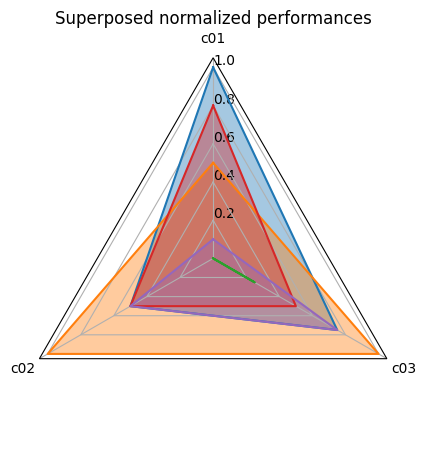

In [20]:
ax = Axis(
    projection=radar_projection_name(len(criteria)),
    title='Superposed normalized performances'
)

for a in alternatives:
    ax.add_plot(
        RadarPlot(
            criteria,
            norm_table.alternatives_values[a].data,
            alpha=0.4,
        )
    )
ax.draw()